In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_inflation = pd.read_csv("Processed Data/ols_model_residuals_inflation.csv")
df_long_term_interest = pd.read_csv("Processed Data/ols_model_residuals_long_term.csv")
df_spread = pd.read_csv("Processed Data/ols_model_residuals_spread.csv")
df_stock = pd.read_csv("Processed Data/stock_residuals.csv")
df_realestate = pd.read_csv("Processed Data/real_estate_residuals.csv")

In [12]:
df_inflation.rename(columns={'residuals': 'Inflation'}, inplace=True)
df_long_term_interest.rename(columns={'residuals': 'Long Terms'}, inplace=True)
df_stock.rename(columns={'residuals': 'Stocks'}, inplace=True)
df_realestate.rename(columns={'residuals': 'Real Estate'}, inplace=True)
df_spread.rename(columns={'residuals': 'Spread'}, inplace=True)

df_inflation['YEAR_MONTH'] = pd.to_datetime(df_inflation['YEAR_MONTH'])
df_inflation = df_inflation[['YEAR_MONTH', 'Inflation']]

df_long_term_interest['YEAR_MONTH'] = pd.to_datetime(df_long_term_interest['YEAR_MONTH'])
df_long_term_interest = df_long_term_interest[['YEAR_MONTH', 'Long Terms']]

df_stock['YEAR_MONTH'] = pd.to_datetime(df_stock['YEAR_MONTH'])
df_stock = df_stock[['YEAR_MONTH', 'Stocks']]

df_realestate['YEAR_MONTH'] = pd.to_datetime(df_realestate['YEAR_MONTH'])
df_realestate = df_realestate[['YEAR_MONTH', 'Real Estate']]

df_spread['YEAR_MONTH'] = pd.to_datetime(df_spread['YEAR_MONTH'])
df_spread = df_spread[['YEAR_MONTH', 'Spread']]

In [13]:
df_merged = pd.merge(df_inflation, df_long_term_interest, on='YEAR_MONTH', how='inner')
df_merged = pd.merge(df_merged, df_stock, on='YEAR_MONTH', how='inner')
df_merged = pd.merge(df_merged, df_realestate, on='YEAR_MONTH', how='inner')
df_merged = pd.merge(df_merged, df_spread, on='YEAR_MONTH', how='inner')

In [14]:
df_merged.set_index('YEAR_MONTH', inplace=True)

In [15]:
corr_matrix = df_merged.corr()  
print(corr_matrix.round(3)*100)

             Inflation  Long Terms  Stocks  Real Estate  Spread
Inflation        100.0        17.3     3.9          1.7    -5.0
Long Terms        17.3       100.0    21.0          1.5    65.9
Stocks             3.9        21.0   100.0         69.7    11.4
Real Estate        1.7         1.5    69.7        100.0     3.5
Spread            -5.0        65.9    11.4          3.5   100.0


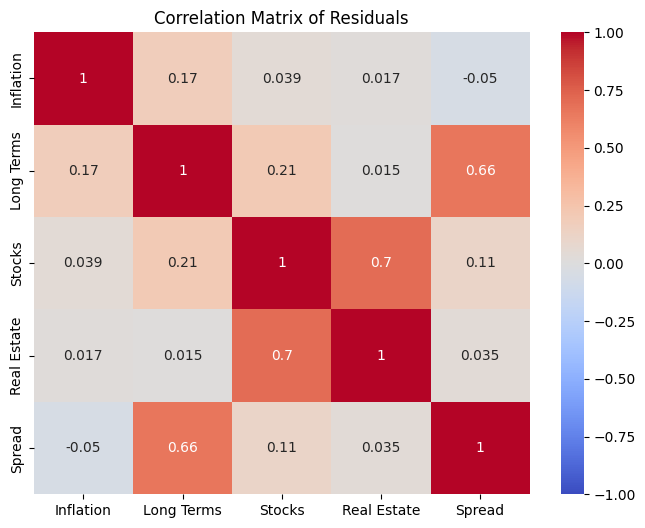

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Residuals")
plt.show()